# Day 08. Exercise 04
# Regression

## 0. Imports

In [3]:
import pandas as pd
import numpy as np

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [8]:
from sklearn.model_selection import train_test_split

In [78]:
df = pd.read_csv('../data/checker_regression.csv').groupby('uid').first().fillna(0)

X = df.drop(['AVG(diff)'], axis=1)
y = df['AVG(diff)']

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, user_1 to user_8
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     int64  
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.0+ KB


In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=21
)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [64]:
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error

In [66]:
def crossval(n_splits, X, y, model):
    kf = KFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=21
    )
    rmse_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        model.fit(X_train, y_train)
        
        rmse_train = root_mean_squared_error(model.predict(X_train), y_train)
        rmse_test = root_mean_squared_error(model.predict(X_test), y_test)
        
        rmse_scores.append(rmse_test)
        
        print(f'train - {rmse_train} | test - {rmse_test}')
    
    print(f"Average RMSE on crossval is {np.mean(rmse_scores)}")

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [67]:
logreg = LinearRegression(fit_intercept=False)
crossval(10, X, y, logreg)

train - 72.76993808124651 | test - 66.0010261543204
train - 73.572177516143 | test - 56.93999619800116
train - 73.52150368295793 | test - 90.18607089188914
train - 70.19624500873643 | test - 85.93184687246872
train - 70.54577537835485 | test - 84.88509144095887
train - 69.82808185925116 | test - 89.03413627284623
train - 70.87449516505839 | test - 93.48456884028366
train - 75.39821241402261 | test - 28.363733796909678
train - 66.27560430106935 | test - 110.26820392379166
train - 73.0456712428643 | test - 55.394757132860974
Average RMSE on crossval is 76.04894315243305


In [69]:
tree = DecisionTreeRegressor(random_state=21, max_depth=25)
crossval(10, X, y, tree)

train - 0.0 | test - 117.17718934888181
train - 0.0 | test - 79.5333147061541
train - 0.0 | test - 0.0
train - 0.0 | test - 78.98656472722058
train - 0.0 | test - 101.36705213854874
train - 0.0 | test - 35.38836908740875
train - 0.0 | test - 0.0
train - 0.0 | test - 69.81014730443323
train - 0.0 | test - 117.52949078296776
train - 0.0 | test - 40.58792924010783
Average RMSE on crossval is 64.03800573357229


In [70]:
forest = RandomForestRegressor(
    n_estimators=100,
    max_depth=25,
    random_state=21
)
crossval(10, X, y, forest)

train - 20.920695939881494 | test - 97.50335139862099
train - 22.513709875327706 | test - 78.01690371916807
train - 26.45753874793136 | test - 20.678674351271315
train - 24.801579078915356 | test - 56.688591592495406
train - 22.400454654459477 | test - 77.74492463343996
train - 23.84950304426348 | test - 53.93331786876579
train - 24.960042347292447 | test - 8.141221739804578
train - 24.33125738694806 | test - 57.41679402832187
train - 21.748562307626617 | test - 91.24344940546369
train - 26.400345641306533 | test - 32.155805517822095
Average RMSE on crossval is 57.35230342551737


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [88]:
import matplotlib.pyplot as plt

In [81]:
predictions = pd.DataFrame({
    'AVG(diff)' : y_test,
    'logreg' : logreg.predict(X_test),
    'decision_tree' : tree.predict(X_test),
    'random_forest' : forest.predict(X_test)
})

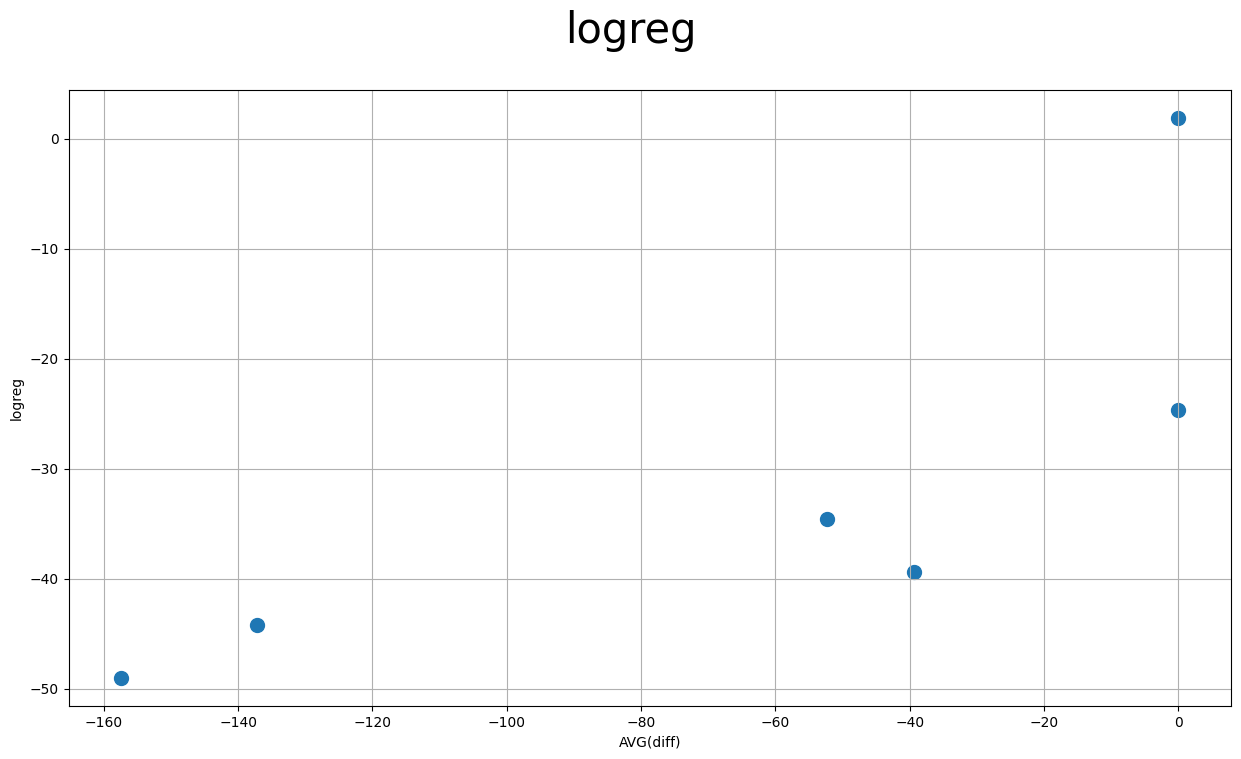

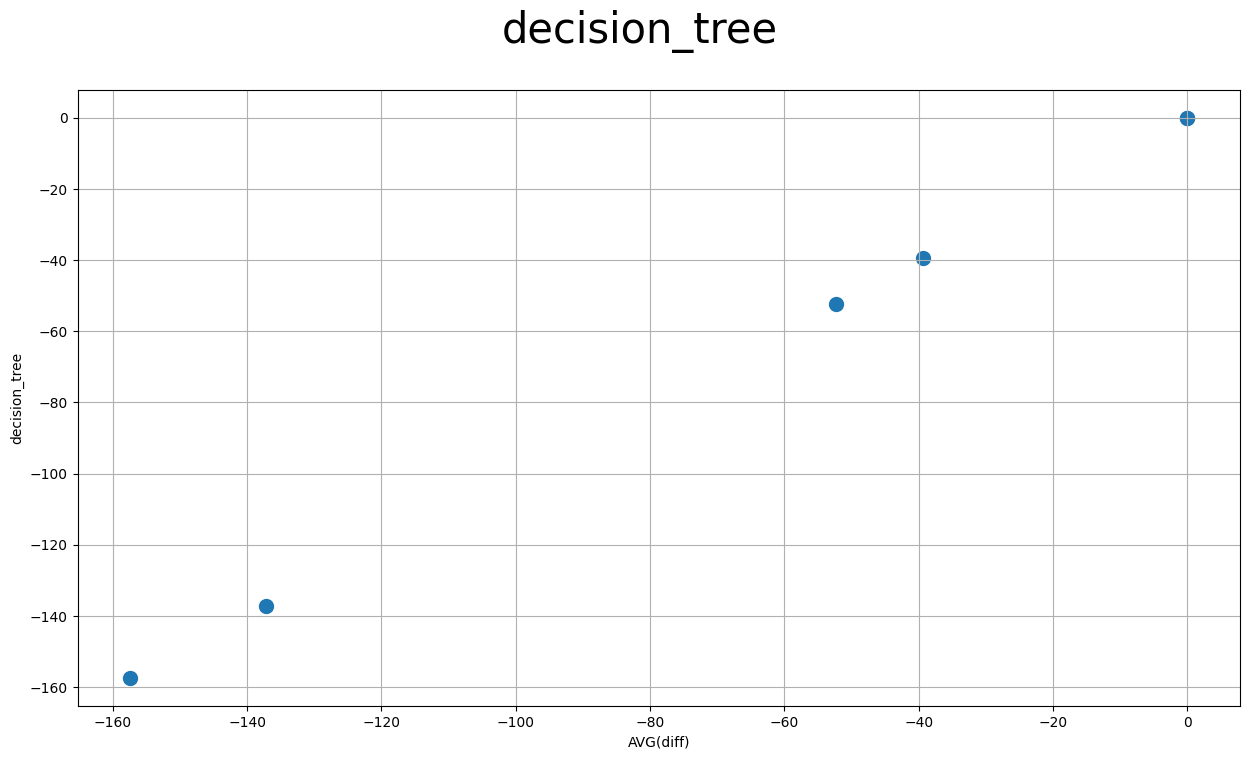

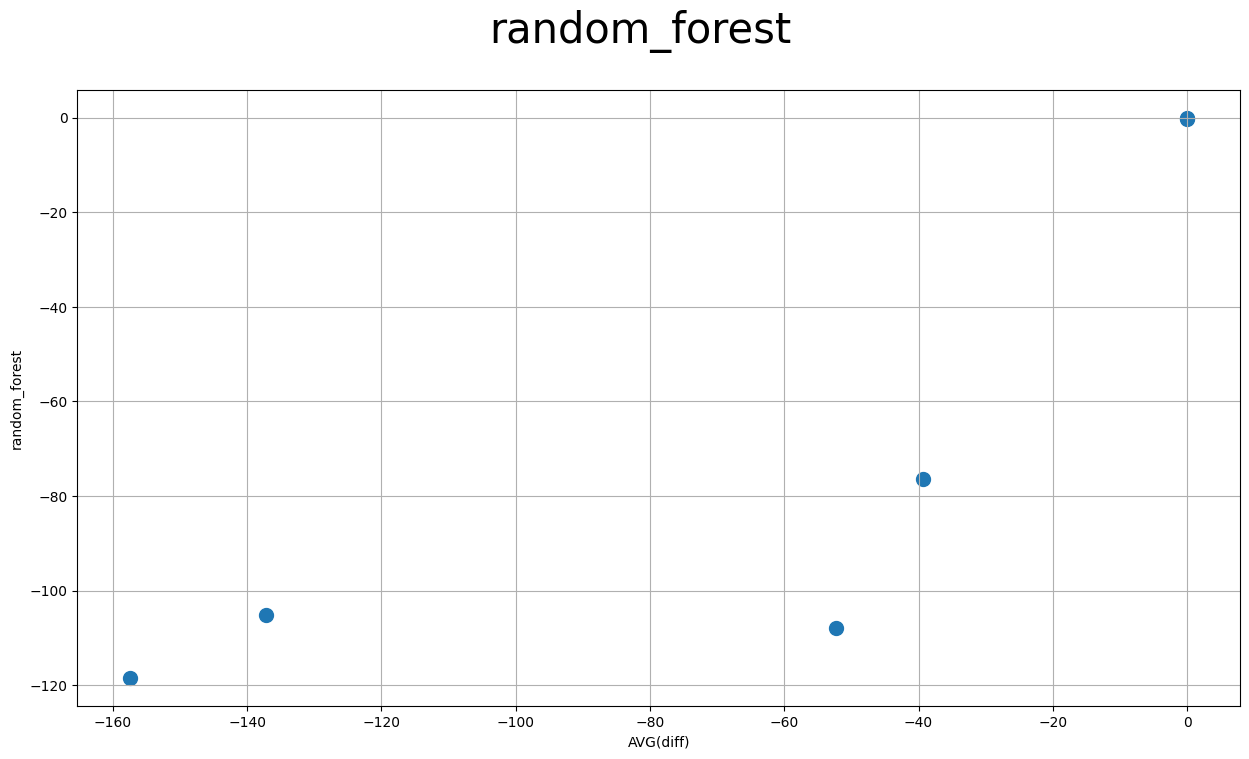

In [91]:
for model in ['logreg', 'decision_tree', 'random_forest']:
    predictions.plot.scatter(
        x='AVG(diff)',
        y=model,
        figsize=(15, 8),
        s=100
    )
    
    plt.suptitle(model, fontsize=30)
    plt.grid()

diaganile